# Atrial Fibrillation Detection from PPG
This notebook trains an LSTM model using preprocessed and segmented PPG windows.

In [17]:
# Imports
import scipy.io as sio
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import os
print(os.getcwd())

d:\PPG-Arrhythmia-Detection\code


In [18]:
# Load preprocessed windows
data = sio.loadmat('D:\PPG-Arrhythmia-Detection\data\ppg_windows.mat')
X_windows = data['X_matrix']       # shape: (num_windows, timesteps)
y_windows = data['y_windows']      # cell array of labels

# Convert labels from cell array to numpy array
y = np.array([int(label[0][0]) for label in y_windows])  # assumes label is [[0]] or [[1]]

# Check shape
print("X shape:", X_windows.shape)
print("y shape:", y.shape)

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\User\AppData\Local\Temp\ipykernel_11016\1516497140.py:2: SyntaxWarning: invalid escape sequence '\P'
  data = sio.loadmat('D:\PPG-Arrhythmia-Detection\data\ppg_windows.mat')


X shape: (625, 9101)
y shape: (9101,)


C:\Users\User\AppData\Local\Temp\ipykernel_11016\1516497140.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = np.array([int(label[0][0]) for label in y_windows])  # assumes label is [[0]] or [[1]]


In [19]:
# Normalize features (per timestep)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_windows)

# Reshape for LSTM: (samples, timesteps, features)
X_scaled = np.expand_dims(X_scaled, axis=2)
print("Reshaped X:", X_scaled.shape)

Reshaped X: (625, 9101, 1)


In [20]:
num_windows = X_windows.shape[0]

# Example: assign all windows label 0 (Non-AF) temporarily
y = np.zeros(num_windows, dtype=int)

print("X_windows shape:", X_windows.shape)
print("y shape:", y.shape)  # should be 625


X_windows shape: (625, 9101)
y shape: (625,)


In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_scaled.shape[1], X_scaled.shape[2])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train
history = model.fit(
    X_train, y_train, 
    validation_split=0.2, 
    epochs=30, 
    batch_size=32
)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9050 - loss: 0.6466 - val_accuracy: 1.0000 - val_loss: 0.5606
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 1.0000 - loss: 0.2652 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 2.3836e-04
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 1.0000 - loss: 2.2338e-04 - val_accuracy: 1.0000 - val_loss: 8.7096e-05
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 1.0000 - loss: 1.1648e-04 - val_accuracy: 1.0000 - val_loss: 6.0436e-05
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 123s 10s/step - accuracy: 1.0000 - loss: 9.4387e-05 - val_accuracy: 1.0000 - val_loss: 5.1449e-05
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 1.0000 - loss: 8.1181e-05 - val_accuracy: 1.0000 - val_loss: 4.6628e-05
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 1.0000 - loss: 8.3

In [24]:
# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.3f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 935ms/step - accuracy: 1.0000 - loss: 1.0393e-05
Test Accuracy: 1.000


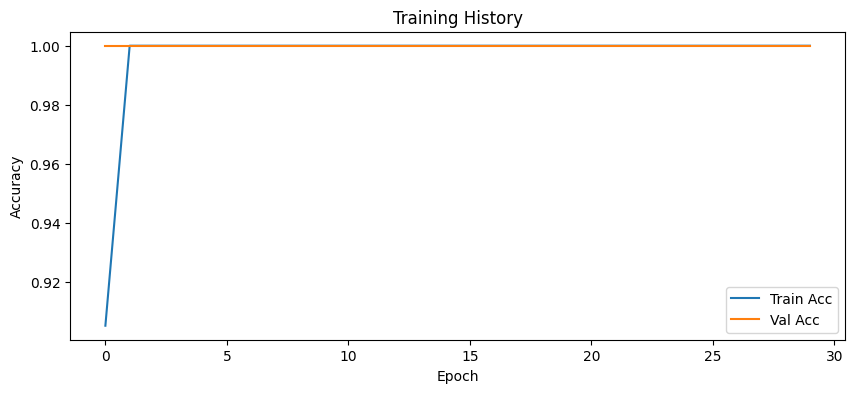

In [25]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

In [26]:
# Save the trained model
model.save(r'D:\PPG-Arrhythmia-Detection\models\ppg_af_lstm.h5')
print("Model saved successfully!")

Model saved successfully!
